# Ejemplo de conceptos de Machine Learning

El probema es predecir si una mamografía corresponde a un tumor maligno o benigno. Sin embargo no se trabajará con las imágenes sino con cuatro características obtenidas de la imagen (variables independientes) y la variable objetivo (variable dependiente/etiqueta):

* Edad del paciente en años
* Forma (variable categórica)
* Margen (variable categórica)
* Densidad (ordinal)
* Severidad: benigno (0) o maligno (1)

. Más información de las variables del Dataset se encuentran en el siguiente link:
http://archive.ics.uci.edu/ml/datasets/mammographic+mass


## Lectura de datos

In [9]:
import urllib.request
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

url="http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"
raw_data = urllib.request.urlopen(url) 
data=np.genfromtxt(raw_data, delimiter=",")

In [10]:
data

array([[ 5., 67.,  3.,  5.,  3.,  1.],
       [ 4., 43.,  1.,  1., nan,  1.],
       [ 5., 58.,  4.,  5.,  3.,  1.],
       ...,
       [ 4., 64.,  4.,  5.,  3.,  0.],
       [ 5., 66.,  4.,  5.,  3.,  1.],
       [ 4., 62.,  3.,  3.,  3.,  0.]])

## Análisis descriptivo

In [11]:
df_X = pd.DataFrame(data[:,1:]) 
df_X.describe()

,0,1,2,3,4
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [12]:
teemp = df_X.corr()

In [13]:
#Análisis de la cantidad de valores nulos

for col in df_X.columns:
    print("Col {0} con {1} valores nulos".format(col, np.sum(np.isnan(df_X[col]))))
    print("Col {0} con {1} % de valores nulos".format(col, np.mean(np.isnan(df_X[col]))))

Col 0 con 5 valores nulos
Col 0 con 0.005202913631633715 % de valores nulos
Col 1 con 31 valores nulos
Col 1 con 0.03225806451612903 % de valores nulos
Col 2 con 48 valores nulos
Col 2 con 0.04994797086368366 % de valores nulos
Col 3 con 76 valores nulos
Col 3 con 0.07908428720083246 % de valores nulos
Col 4 con 0 valores nulos
Col 4 con 0.0 % de valores nulos


In [14]:
print("Tamaño antes: {}".format(df_X.shape))
clean_df_X=df_X.dropna()
print("Tamaño despues: {}".format(clean_df_X.shape))


Tamaño antes: (961, 5)
Tamaño despues: (831, 5)


## Modelo predictivo

In [26]:
X = clean_df_X.loc[:,range(4)]
y = clean_df_X.loc[:,4]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # Separar datos de entrenamiento y de prueba

print("Numero de muestras de entrenamiento: %3.f" % X_train.shape[0])
print("Numero de muestras de prueba: %3.f" % X_test.shape[0])

Numero de muestras de entrenamiento: 664
Numero de muestras de prueba: 167


In [45]:
clf = RandomForestClassifier(max_depth=6, random_state=0) # crear el modelo

clf.fit(X_train, y_train) # Entrenar el modelo

RandomForestClassifier(max_depth=6, random_state=0)

## Evaluar el modelo

In [46]:
print('entrenamiento',np.mean(clf.predict(X_train)!=y_train))
print('prueba', np.mean(clf.predict(X_test)!=y_test))

entrenamiento 0.15813253012048192
prueba 0.16167664670658682


## Evaluar diferentes hiperparametros

RandomForestClassifier(max_depth=1, random_state=0)

RandomForestClassifier(max_depth=2, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=4, random_state=0)

RandomForestClassifier(max_depth=5, random_state=0)

RandomForestClassifier(max_depth=6, random_state=0)

RandomForestClassifier(max_depth=7, random_state=0)

RandomForestClassifier(max_depth=8, random_state=0)

RandomForestClassifier(max_depth=9, random_state=0)

RandomForestClassifier(max_depth=10, random_state=0)

RandomForestClassifier(max_depth=11, random_state=0)

RandomForestClassifier(max_depth=12, random_state=0)

RandomForestClassifier(max_depth=100, random_state=0)

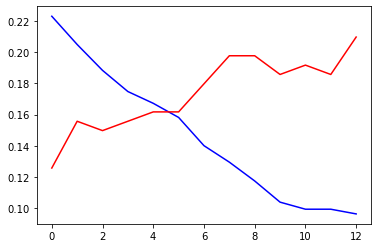

In [40]:
#Ejemplo de sobreentrenamiento (overfitting)

%matplotlib inline
import matplotlib.pyplot as plt

max_depths= [1,2,3,4,5,6,7,8,9,10,11,12,100]
train_error = []
test_error = []

for max_depth in max_depths:
    
    #Creación del algoritmo
    clf = RandomForestClassifier(max_depth=max_depth, random_state=0)
    
    #Entrenamiento del algoritmo
    clf.fit(X_train, y_train)

    train_error.append(np.mean(clf.predict(X_train)!=y_train))
    test_error.append(np.mean(clf.predict(X_test)!=y_test))

plt.plot(train_error, color="b")
plt.plot(test_error, color="r")


RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

RandomForestClassifier(max_depth=3, random_state=0)

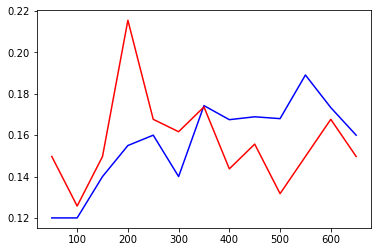

In [42]:
#Ejemplo generalización vs. número de muestras

original_size = X_train.shape[0]

train_error = []
test_error = []

for train_size in range(50, original_size, 50):
    
    #Submuestro del algoritmo
    samples = np.random.randint(0,original_size,train_size)
    X_train2 = X_train.iloc[samples,]
    y_train2 = y_train.iloc[samples]
    
    #Creación del modelo
    clf = RandomForestClassifier(max_depth=3, random_state=0)
    
    #Entrenamiento del modelo
    clf.fit(X_train2, y_train2)

    train_error.append(np.mean(clf.predict(X_train2)!=y_train2))
    test_error.append(np.mean(clf.predict(X_test)!=y_test))

plt.plot(list(range(50, original_size, 50)),train_error, color="b")
plt.plot(list(range(50, original_size, 50)),test_error, color="r")  
    